## Bevington 2.15
A problem arises when recording data with electronic counters in that the system may saturate when rate are very high, leading to a "dead time". For example, after a particle has passed through a detector, the equipment will be "dead" while the detector recovers and the electronics stores away the results. If a second particle passes through the detector in this time period, it will not be counted.

1. Assume that the counter has a dead time of $200$ ns $(200 \times 10^{-9} \text{s})$ and is exposed to a beam of $1 \times 10^{6}$ particles per second so that the mean number of particles hitting the counter in the $200$-ns time slot is $\mu = 0.2$. From the Poisson probability for this process, find the efficiency of the counter, that is, the ratio of the average number of particles counted to the average number that pass through the counter in the $200$-ns time period.

2. Repeat the calculation for beam rates of $2$, $4$, $6$, $8$ and $10 \times 10^{6}$ particles per second, and plot a graph of counter efficiency as a function of beam rate.

To find the efficiency, we can ask how many particles we expect in the
window after each counted particle. This will be
$$\frac{\text{uncounted}}{\text{counted}} = \sum_{n=0}^{\infty} np\left(n\right) =
\left<np\left(n\right)\right>$$

Where $p(n)$ follows is the poisson probability
$\frac{\mu^ne^{-\mu}}{n!}$. The fast way to solve this is to remember or
derive the factorial moments of the poisson distribution.
$$\begin{aligned}
\left<p\left(n\right)\right> &= \mu^0 \\
\left<np\left(n\right)\right> &= \mu^1 \\
\left<n(n-1)p\left(n\right)\right> &= \mu^2 \\
\text{...}\end{aligned}$$

Using this solution

$$\frac{\text{counted}}{\text{total}} =
\frac{\text{counted}}{\text{counted} + \text{uncounted}} = \frac{1}{1
  + \frac{\text{uncounted}}{\text{counted}}} = \frac{1}{1 +
  \left<np\left(n\right)\right>} = \frac{1}{1 + \mu}$$


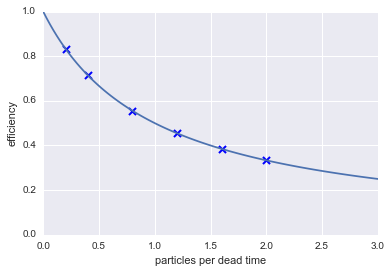

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.linspace(0, 3, 100)
rates = [10**6, 2 * 10**6, 4 * 10**6, 6 * 10**6, 8 * 10**6, 10**7]
mus = [rate * 200 * 10**-9 for rate in rates]
efficiencies = [ 1 / (1 + mu) for mu in mus]

plt.plot(x, 1 / (1 + x));
plt.scatter(mus, efficiencies, s=50, lw=2, marker='x')
plt.xlim([0, 3])
plt.ylim([0, 1])
plt.ylabel('efficiency');
plt.xlabel('particles per dead time');

In [2]:
import pandas as pd
pd.set_option('precision', 3)
pd.DataFrame.from_items([('rate', rates), 
                         ('mu', mus), 
                         ('efficiency', efficiencies)])

,rate,mu,efficiency
0,1000000,0.2,0.833
1,2000000,0.4,0.714
2,4000000,0.8,0.556
3,6000000,1.2,0.455
4,8000000,1.6,0.385
5,10000000,2.0,0.333


## Bevington 2.16
Show by numerical calculation that, for the Gaussian probability distribution, the full-width at half maximum $\Gamma = 2.354\sigma$ [Equation (2.28)]

Gaussian probability
$$p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-x^2/2\sigma^2}$$

the ratio to the maximum $$\begin{aligned}
p(x)/p(0) = e^{-x^2/2\sigma^2} &= 0.5 \\
            \frac{-x^2}{2\sigma^2}   &= \log(0.5) \\
            x &= \sigma \sqrt{2\log{2}} \\
            \text{FWHM} &= 2\sigma \sqrt{2\log{2}} = 2.3548\sigma\end{aligned}$$

## Bevington 4.5
A student measures the period of a pendulum and obtains the following values.

trial  |   1  |  2   |   3  |  4   |   5  |  6   |   7  |  8
:----- |:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:
Period | 1.35 | 1.34 | 1.32 | 1.36 | 1.33 | 1.34 | 1.37 | 1.35 

1. Find the mean and standard deviation of the measurements and the standard deviation of the mean.

2. Estimate the probability that another single measurement will fall within $0.02$ s of the mean.

In [15]:
import numpy as np
import scipy.stats as st
periods = np.array([1.35, 1.34, 1.32, 1.36, 1.33, 1.34, 1.37, 1.35])

sum = 0
for p in periods: sum += p

mean = sum / len(periods)
print('mean: {0:.4f}'.format(mean))

squareDiff = 0
for p in periods: squareDiff += (p - mean)**2

s = np.sqrt(squareDiff/(len(periods) - 1))
print('standard deviation: {0:.4f}'.format(s))


mean: 1.3450
standard deviation: 0.0160


We don’t really have enough data to establish that the measurements are
gaussian, but gaussian is the simplest choice, so we will use it. Norm
is scipy’s gaussian distribution, we will use cdf, the cumulative
distribution function:

$$\int_{-\infty}^x g(x')dx'$$

Remember to multiply the area of the tail by 2.

In [16]:
print('z: {0:.4f}'.format(0.02 / s))
p = 1 - 2*(1 - st.norm.cdf(0.02 / s))
print('probability: {0:.4f}'.format(p))

z: 1.2472
probability: 0.7877
